# Coeus AI
## Jupyter Notebook para realizar el pre-procesamiento de las imágenes.
### Imports

In [1]:
import os
import cv2
import json
import random
import numpy as np
import pandas as pd
import pytesseract
import matplotlib.pyplot as plt
from PIL import Image


from extras.preprocessing import *

### Se crea una clase Documento

In [2]:
class Documento:
    """
    Clase que contiene todos los datos necesarios para describir y analizar un Documento.
    """
    def __init__(self, nombre_archivo, conjunto, texto_manual):
        # Datos proporcionados originalmente
        self.nombre_archivo = nombre_archivo
        self.conjunto = conjunto
        self.texto_manual = texto_manual
        
        # Datos obtenidos automáticamente
        self.texto_ocr_default = None
        self.texto_ocr_mejorado = None
        
        # PLN
        self.personas = []
        self.organizaciones = []
        self.lugares = []
        self.fechas = []
        
    def get_ruta_archivo(self):
        return os.path.join(self.conjunto, self.nombre_archivo)
    
    def set_texto_ocr_default(self, texto):
        self.texto_ocr_default = texto

    def set_texto_ocr_mejorado(self, texto):
        self.texto_ocr_mejorado = texto
    
    def add_persona(self, person):
        self.personas.append(person)
    
    def add_organizacion(self, organizacion):
        self.organizaciones.append(organizacion)
                            
    def add_lugar(self, lugar):
        self.lugares.append(lugar)
    
    def add_fecha(self, fecha):
        self.fechas.append(fecha)

### Creando un sub-conjunto aleatorio de pruebas

In [3]:
def generate_dataset(path_to_transcripions):
    """
    Función que genera un diccionario de objetos Documento para cada uno
    de los elementos presentes en el archivo de transcripciones proporcionado.
    """
    # Se carga el archivo de transcripciones
    df = pd.read_csv(path_to_transcripions)
    
    # Se crea un diccionario para los documentos
    documentos = {}
    
    # Por cada archivo dentro del archivo de transcripciones
    for index in df.index:
        # Obteniendo el nombre del archivo
        filename = str(df['NombreArchivo'][index])
        
        # Se crea un documento temporal, que será añadido al diccionario
        temporal_doc = Documento(filename, 
                                 df['Conjunto'][index], 
                                 df['Texto'][index])

        # Agregando el documento al diccionario
        documentos[filename] = temporal_doc

    return documentos

def generate_random_test(dataset, N, conjunto):
    """
    Función que genera un subconjunto aleatorio de N elementos a partir de un determinado 
    conjunto de 'dataset'.
    dataset es un diccionario de Documentos, se puede generar con generate_dataset.
    """
    # Se filtran los elementos segun 'conjunto'
    filtered_dict = dict(filter(lambda elem: elem[1].conjunto == conjunto, dataset.items()))
    
    # Se retornan N elementos aleatorios
    return dict(random.sample(filtered_dict.items(), N))

def datos_head(dataset, N):
    """
    Función que imprime N elementos (Documento) de un dataset. Para fines de 
    visualización.
    """
    for item in list(dataset.items())[:N]:
        print("Nombre del archivo:", item[1].nombre_archivo)
        print("Conjunto del archivo:", item[1].conjunto)
        print("Ruta:",item[1].get_ruta_archivo())
        print('-------------------------------------------------------------------')
    
dataset = generate_dataset("Datos/JusticIA_DatosTranscripciones.csv")
test_set = generate_random_test(dataset, 100, 'Fichas_manual')
datos_head(test_set, 5)

Nombre del archivo: Ficheros_Salas_Obregon_Ignacio_Arturo_Ignacio_Arturo_Salas_Obregon,_fichas-138-.JPG
Conjunto del archivo: Fichas_manual
Ruta: Fichas_manual/Ficheros_Salas_Obregon_Ignacio_Arturo_Ignacio_Arturo_Salas_Obregon,_fichas-138-.JPG
-------------------------------------------------------------------
Nombre del archivo: Ficheros_UAG_75-07-03_a_76-04-05_UAG,_fichas-11-.JPG
Conjunto del archivo: Fichas_manual
Ruta: Fichas_manual/Ficheros_UAG_75-07-03_a_76-04-05_UAG,_fichas-11-.JPG
-------------------------------------------------------------------
Nombre del archivo: Ficheros_UAG_79-07-12_a_80-03-04_UAG,_fichas-110-.JPG
Conjunto del archivo: Fichas_manual
Ruta: Fichas_manual/Ficheros_UAG_79-07-12_a_80-03-04_UAG,_fichas-110-.JPG
-------------------------------------------------------------------
Nombre del archivo: Ficheros_ACNR_militantes_Mota_Gonzalez_Jorge_IMG_0299.JPG
Conjunto del archivo: Fichas_manual
Ruta: Fichas_manual/Ficheros_ACNR_militantes_Mota_Gonzalez_Jorge_IMG_029

### Funciones de pre-procesamiento

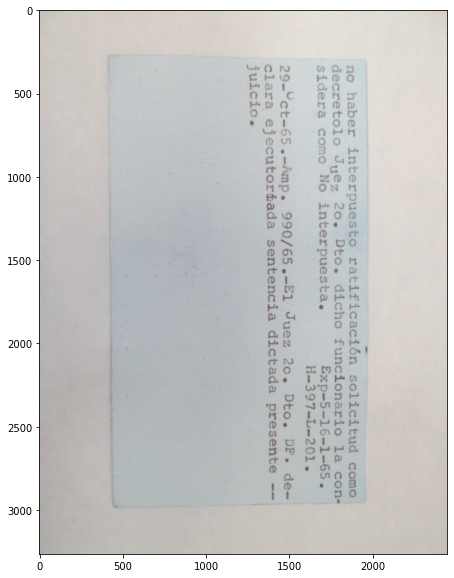

In [4]:
# Carga de imagen de prueba
sample = test_set['Ficheros_ACNR_militantes_Martinez_Bravo_Eugenio_IMG_0169.JPG']
sample_path = os.path.join("Datos/", sample.get_ruta_archivo())

img = cv2.imread(os.path.join(sample_path))

plt.figure(figsize=(20,10))
plt.imshow(img)

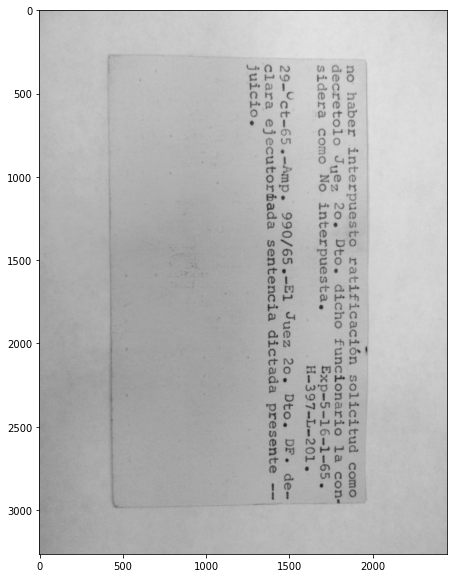

In [5]:
img = rgb_to_gray(img)

plt.figure(figsize=(20,10))
plt.imshow(img, cmap='gray')

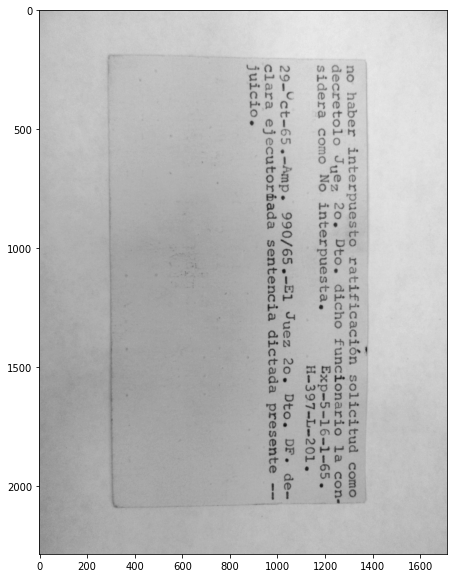

In [6]:
img = downscale_img(img, 0.7)
    
plt.figure(figsize=(20,10))
plt.imshow(img, cmap='gray')

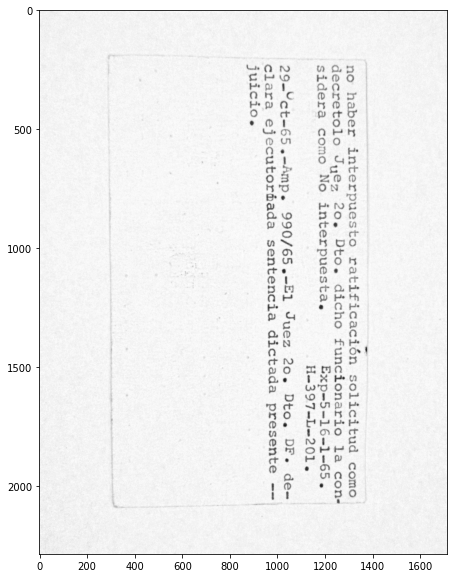

In [7]:
img = shadow_removal(img)

plt.figure(figsize=(20,10))
plt.imshow(img, cmap='gray')

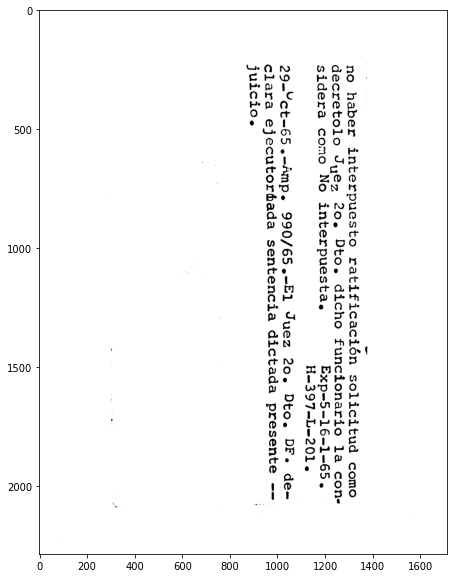

In [8]:
T, img_otsu = otsu_binarization(img)

img_otsu_inv = invert(img_otsu)

plt.figure(figsize=(20,10))
plt.imshow(img_otsu_inv, cmap='gray')

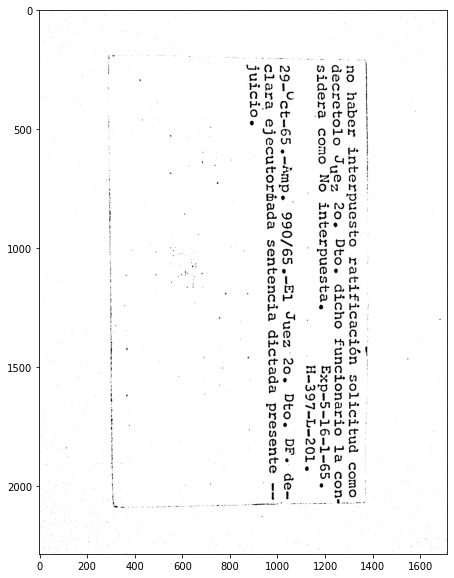

In [9]:
img_binaria = adaptive_binarization(img)

img_binaria_invt = invert(img_binaria)

plt.figure(figsize=(20,10))
plt.imshow(img_binaria_invt, cmap='gray')

In [ ]:
# Corrección de orientación con Tesseract
"""
img_rotada_tess = deskew_tesseract(sample_path)

plt.figure(figsize=(20,10))
plt.imshow(img_rotada_tess, cmap='gray')
"""

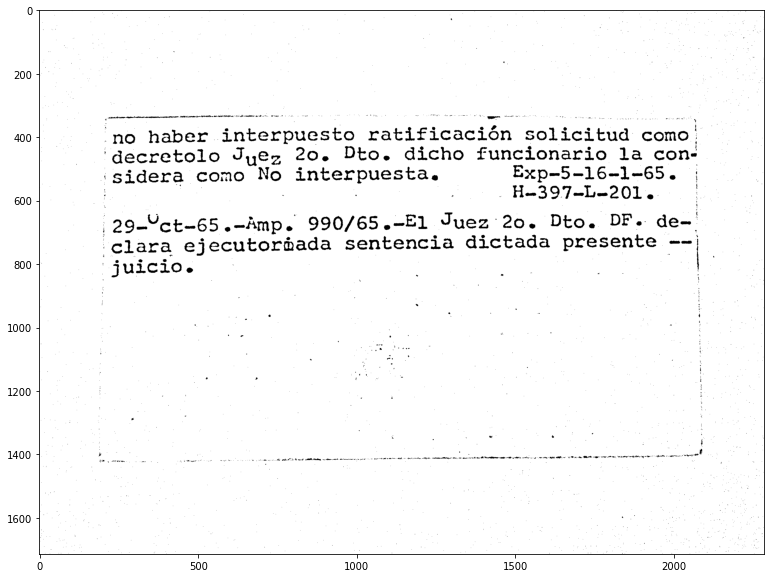

In [31]:
# Corrección de orientación con CV2
img_rotada_cv2 = deskew_cv2(img_binaria_invt)

plt.figure(figsize=(20,10))
plt.imshow(img_rotada_cv2, cmap='gray')

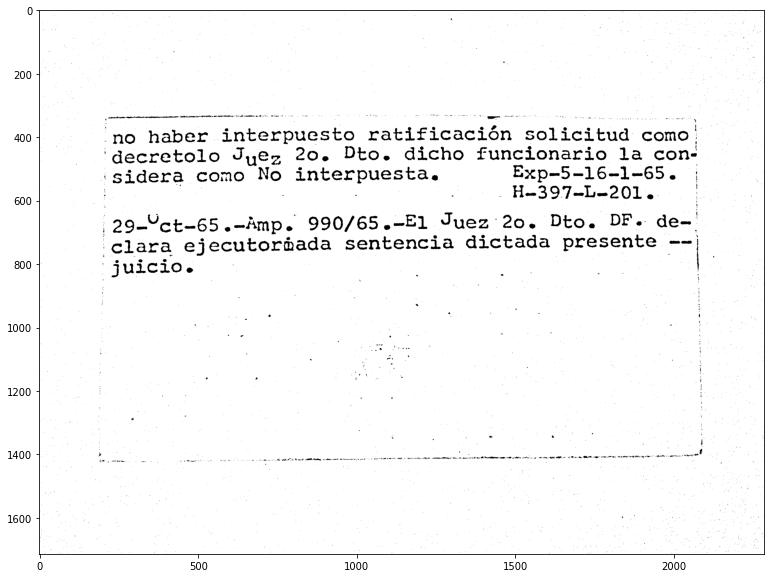

In [32]:
# Eliminación de los bordes
img_rotada_nb = remove_borders(img_rotada_cv2)

plt.figure(figsize=(20,10))
plt.imshow(img_rotada_nb, cmap='gray')

### Evaluación de la eficacia del pre-procesamiento sobre el conjunto de pruebas